In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [188]:
## Buat data dummy
## Misalkan saya mau membuat persamaan X2 + 2x + 5
def persamaan(x):
    # x**2 + 
    return (((x**2) + (2*x)) + 5)
def buatPlot(x,Y):
    plt.ylabel("Hasil fungsi")
    plt.xlabel("Data deret")
    plt.plot(x,Y)
    plt.show()


def un_unormed(data, Y_std, Y_mean):
    return data * Y_std + Y_mean

def visual_plot(X_train, X_test, y_train, y_test, predict = [], tittle="Plot"):
  # Buat figure
  plt.figure()

  # buat judul
  plt.title(tittle)

  # Plot the data with color blue (train) green (test)
  plt.scatter(X_train, y_train, c="b", label="Training data")
  plt.scatter (X_test, y_test, c="g", label ="Test data")

  # plot predict result
  plt.scatter (X_test, predict, c="r", label="Predict")

  # Show legend
  plt.legend()

x = np.arange(-50,120).astype(np.float32)
Y = np.array([persamaan(a) for a in x]).astype(np.float32)

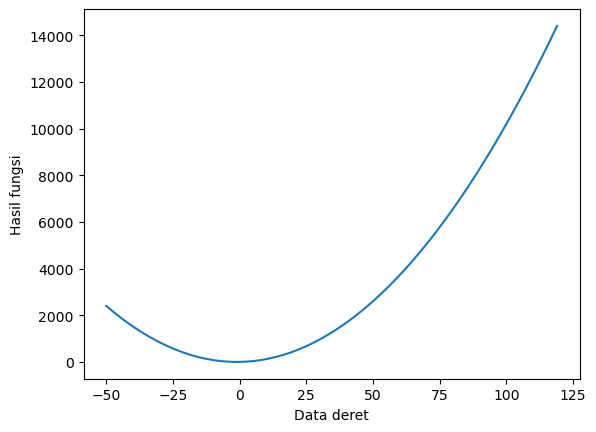

In [189]:
buatPlot(x,Y)

Saya mau membuat model NN yang dapat memprediksi nilai output berdasarkan nilai input.

In [107]:
x_train, x_test = x[:140], x[140:]
Y_train, Y_test = Y[:140], Y[140:] 

In [193]:
#@title { run: "auto", vertical-output: true }
# Membuat random seed, kalau kata pak Mardiyanto bagaimana baby dapat anugerah
tf.random.set_seed = 42

# Membuat model
model = tf.keras.Sequential(
    [
      tf.keras.layers.Dense(128, input_shape=[1], activation='relu', name="layer_satu"),
        tf.keras.layers.Dense(128, input_shape=[1], activation='relu', name="layer_dua"),
      tf.keras.layers.Dense(1, name="layer_akhir")
    ])

model.compile (
    loss = "mae",
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["mae"]
)

#3. Fit the model
model.fit(x_train, Y_train, epochs=100)

Epoch 1/100


C:\Users\maruf\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2056.2969 - mae: 2056.2969
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2047.5293 - mae: 2047.5293 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2038.9094 - mae: 2038.9094
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2030.0306 - mae: 2030.0306 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2019.8629 - mae: 2019.8629 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2008.1337 - mae: 2008.1337
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1993.2688 - mae: 1993.2688 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1974.7375 - mae: 1974.7375 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1951.8951 - mae: 1951.8951 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1923.5375 - mae: 1923.5375 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1889.4340 - mae: 1889.4340 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1849.500

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


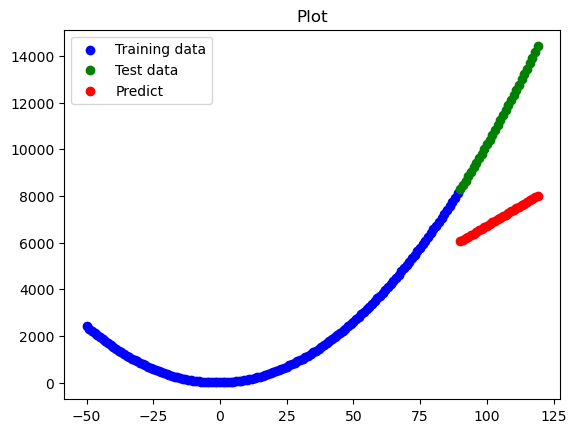

In [194]:
predict_awal_model = model.predict(x_test)
visual_plot(x_train,x_test, Y_train, Y_test, predict_awal_model)

## Menggunakan trai test split

In [109]:
from sklearn.model_selection import train_test_split

x2_train, x2_test,Y2_train, Y2_test = train_test_split(x,Y)

In [115]:
# Membuat model
model = tf.keras.Sequential(
    [
      tf.keras.layers.Dense(64, input_shape=[1], activation='relu', name="layer_satu"),
        tf.keras.layers.Dense(64, activation='relu', name="layer_dua"),
      tf.keras.layers.Dense(1, name="layer_akhir")
    ])

model.compile (
    loss = "mae",
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["mae"]
)

#3. Fit the model
model.fit(x2_train, Y2_train, epochs=50, batch_size=16,)

Epoch 1/50


C:\Users\maruf\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3448.8396 - mae: 3448.8396
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3232.6169 - mae: 3232.6169 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2713.4414 - mae: 2713.4414 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1903.1207 - mae: 1903.1207 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1231.1152 - mae: 1231.1152 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1216.6936 - mae: 1216.6936 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1032.1140 - mae: 1032.1140 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1099.6844 - mae: 1099.6844 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1049.9271 - mae: 1049.9271 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1032.5845 - mae: 1032.5845 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1044.3566 - mae: 1044.3566
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1033.5095 - mae: 1033.5095 
Ep

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


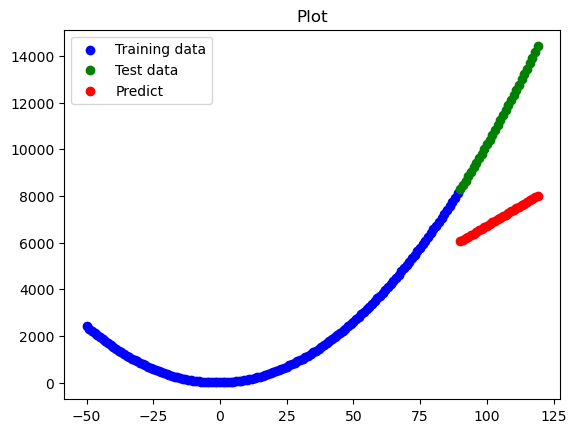

In [195]:
predict_awal_model = model.predict(x_test)
visual_plot(x_train,x_test, Y_train, Y_test, predict_awal_model)

## Coba kita normalisasi data

In [127]:
x_mean, x_std = x.mean(), x.std()
Y_mean, Y_std = Y.mean(), Y.std()

x_norm = (x - x_mean) / x_std
Y_norm = (Y - Y_mean) / Y_std


xn_train, xn_test, Yn_train, Yn_test = train_test_split(x_norm, Y_norm)

In [140]:
# Membuat model
model = tf.keras.Sequential(
    [
      tf.keras.layers.Dense(64, input_shape=[1], activation='relu', name="layer_satu"),
        tf.keras.layers.Dense(64, activation='relu', name="layer_dua"),
      tf.keras.layers.Dense(1, name="layer_akhir")
    ])

model.compile (
    loss = "mae",
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["mae"]
)

#3. Fit the model
model.fit(xn_train, Yn_train, epochs=50)

Epoch 1/50


C:\Users\maruf\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.6069 - mae: 0.6069
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5059 - mae: 0.5059 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4202 - mae: 0.4202
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4589 - mae: 0.4589
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3918 - mae: 0.3918
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3842 - mae: 0.3842
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3296 - mae: 0.3296
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2544 - mae: 0.2544
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2039 - mae: 0.2039
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1838 - mae: 0.1838
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1825 - mae: 0.1825
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1375 - mae: 0.1375
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1169 - mae:

## Besarkan Neuron / dense

In [141]:
# Membuat model
model = tf.keras.Sequential(
    [
      tf.keras.layers.Dense(128, input_shape=[1], activation='relu', name="layer_satu"),
        tf.keras.layers.Dense(128, activation='relu', name="layer_dua"),
      tf.keras.layers.Dense(1, name="layer_akhir")
    ])

model.compile (
    loss = "mae",
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["mae"]
)

#3. Fit the model
model.fit(xn_train, Yn_train, epochs=50)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.9879 - mae: 0.9879
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5590 - mae: 0.5590
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4396 - mae: 0.4396
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5102 - mae: 0.5102
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4462 - mae: 0.4462
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4907 - mae: 0.4907
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4592 - mae: 0.4592
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4416 - mae: 0.4416
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4493 - mae: 0.4493
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4280 - mae: 0.4280
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4348 - mae: 0.4348
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4206 - mae: 0.4206
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4

## Mengecilkan learning rate

In [130]:
# Membuat model
model = tf.keras.Sequential(
    [
      tf.keras.layers.Dense(128, input_shape=[1], activation='relu', name="layer_satu"),
        tf.keras.layers.Dense(128, activation='relu', name="layer_dua"),
      tf.keras.layers.Dense(1, name="layer_akhir")
    ])

model.compile (
    loss = "mae",
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["mae"]
)

#3. Fit the model
model.fit(xn_train, Yn_train, epochs=50)

Epoch 1/50


C:\Users\maruf\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7297 - mae: 0.7297
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5792 - mae: 0.5792
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4886 - mae: 0.4886
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4273 - mae: 0.4273
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3965 - mae: 0.3965
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3677 - mae: 0.3677
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3470 - mae: 0.3470
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3260 - mae: 0.3260
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2989 - mae: 0.2989
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2723 - mae: 0.2723
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2445 - mae: 0.2445
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2097 - mae: 0.2097
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1793 - mae: 

## Menambahkan Layer

In [147]:
#@title { run: "auto", vertical-output: true }
# Membuat model
model = tf.keras.Sequential(
    [
      tf.keras.layers.Dense(64, input_shape=[1], activation='relu', name="layer_satu"),
        tf.keras.layers.Dense(64, activation='relu', name="layer_tiga"),
      tf.keras.layers.Dense(1, name="layer_akhir")
    ])

model.compile (
    loss = "mae",
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["mae"]
)

#3. Fit the model
model.fit(xn_train, Yn_train, epochs=50)

Epoch 1/50


C:\Users\maruf\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.7630 - mae: 0.7630
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6730 - mae: 0.6730
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6070 - mae: 0.6070
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.5590 - mae: 0.5590 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5227 - mae: 0.5227
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4865 - mae: 0.4865
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4570 - mae: 0.4570
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4265 - mae: 0.4265
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3990 - mae: 0.3990
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3699 - mae: 0.3699
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3426 - mae: 0.3426
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3175 - mae: 0.3175
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2880 - mae:

In [148]:
model.summary()

Model: "sequential_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer_satu (Dense)                   │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_tiga (Dense)                   │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_akhir (Dense)                  │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,061 (51.02 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,708 (34.02 KB)

In [185]:
pred_1 = model.predict(xn_test)
unorm_pred = (pred_1 * Y_std) + Y_mean
len(unorm_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


43

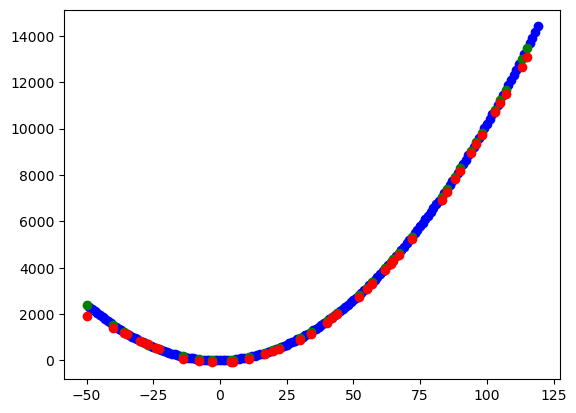

In [187]:
# Plot the data with color blue (train) green (test)
# xn_train 
dataBacX = (xn_train * x_std) + x_mean
dataBacY = (Yn_train * Y_std) + y_mean 
dataBacXtest = (xn_test * x_std) + x_mean
dataBacYtest = (Yn_test * Y_std) + y_mean 

plt.scatter(dataBacX, dataBacY, c="b", label="Training data",)
plt.scatter (dataBacXtest, dataBacYtest, c="g", label ="Test data")

plt.scatter (dataBacXtest, unorm_pred, c="r", label="Predict")
# plot predict result
# plt.plot (X_test, predict, c="r", label="Predict")
# plt.plot (X_test, y_test, c="g", label ="Test data")

Rubah menggunakan split berdasarkan row

In [196]:


x_mean, x_std = x.mean(), x.std()
Y_mean, Y_std = Y.mean(), Y.std()

x_norm = (x - x_mean) / x_std
Y_norm = (Y - Y_mean) / Y_std


xn_train, xn_test = x_norm[:140], x_norm[140:]
Yn_train, Yn_test = Y_norm[:140], Y_norm[140:] 

# Membuat model
model = tf.keras.Sequential(
    [
      tf.keras.layers.Dense(128, input_shape=[1], activation='relu', name="layer_satu"),
        tf.keras.layers.Dense(128, activation='relu', name="layer_dua"),
      tf.keras.layers.Dense(1, name="layer_akhir")
    ])

model.compile (
    loss = "mae",
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["mae"]
)

#3. Fit the model
model.fit(xn_train, Yn_train, epochs=50)

Epoch 1/50


C:\Users\maruf\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.5649 - mae: 0.5649
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4097 - mae: 0.4097 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3355 - mae: 0.3355 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3182 - mae: 0.3182
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3021 - mae: 0.3021 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2741 - mae: 0.2741 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2388 - mae: 0.2388 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2022 - mae: 0.2022 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1619 - mae: 0.1619
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1355 - mae: 0.1355 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1203 - mae: 0.1203
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1130 - mae: 0.1130 
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1087 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


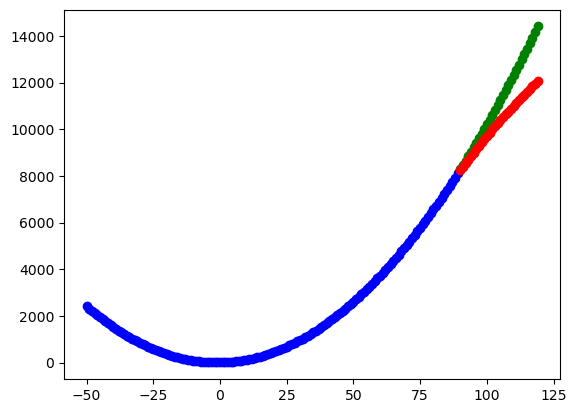

In [197]:
# Plot the data with color blue (train) green (test)
# xn_train
pred_1 = model.predict(xn_test)
unorm_pred = (pred_1 * Y_std) + Y_mean
len(unorm_pred)

dataBacX = (xn_train * x_std) + x_mean
dataBacY = (Yn_train * Y_std) + y_mean 
dataBacXtest = (xn_test * x_std) + x_mean
dataBacYtest = (Yn_test * Y_std) + y_mean 

plt.scatter(dataBacX, dataBacY, c="b", label="Training data",)
plt.scatter (dataBacXtest, dataBacYtest, c="g", label ="Test data")

plt.scatter (dataBacXtest, unorm_pred, c="r", label="Predict")
# plot predict result
# plt.plot (X_test, predict, c="r", label="Predict")
# plt.plot (X_test, y_test, c="g", label ="Test data")